#Real GDP

## 1 Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2 Database

In [93]:
db=pd.read_csv("macrodata.csv")
db

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

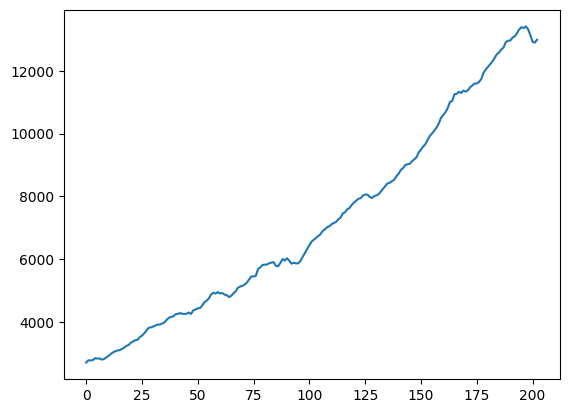

In [94]:
db["realgdp"].plot()

## 3 Stationarity

In [95]:
from statsmodels.tsa.stattools import adfuller
test_sationarity=adfuller(db["realgdp"],autolag="AIC")
print("P-Value: ", test_sationarity[1])

P-Value:  0.9982455372335032


## 3.1 First diff

In [96]:
db["realgdp_return"]=db["realgdp"]-db["realgdp"].shift(1)

In [97]:
db

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,realgdp_return
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,NaN
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,68.452
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,-3.313
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,9.716
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,62.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-90.666
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-182.680
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,-216.510
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,-23.906


In [98]:
test_stationarity_2=adfuller(db["realgdp_return"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  3.327882187668224e-08


## 4 Partial Aitocorrelation

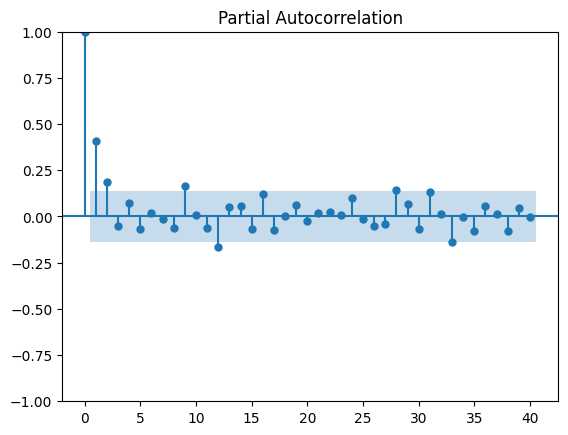

In [99]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["realgdp_return"].dropna(),lags=40)

## 4.1 Auto acf

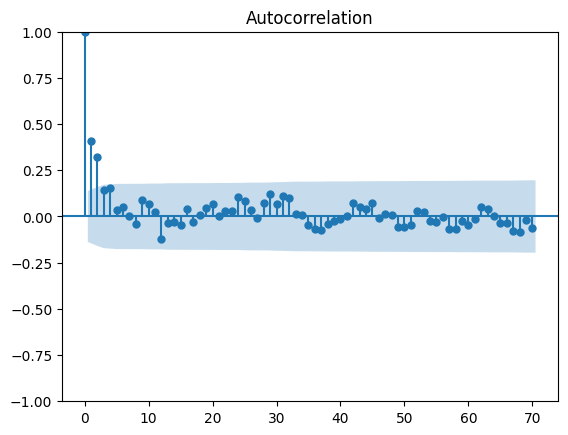

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db["realgdp_return"].dropna(), lags=70)

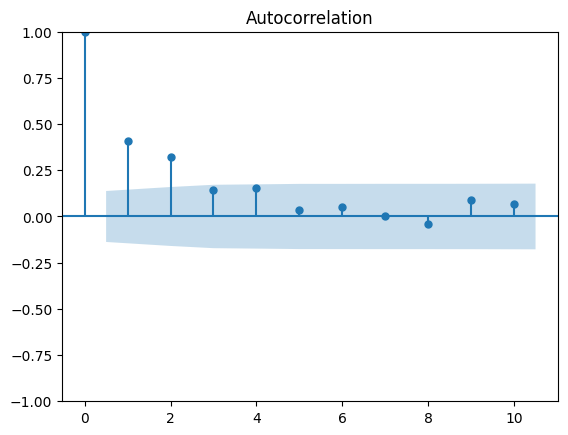

In [101]:
acf=plot_acf(db["realgdp_return"].dropna(), lags=10)

## 5 Autoregressive model

In [102]:
from statsmodels.tsa.ar_model import AutoReg

In [103]:
from statsmodels.tsa.arima.model import ARIMA

In [104]:
modelARIMA = ARIMA(db["realgdp_return"].dropna(), order=(13,1,3)).fit()
print(modelARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         realgdp_return   No. Observations:                  202
Model:                ARIMA(13, 1, 3)   Log Likelihood               -1071.808
Date:                Tue, 05 Sep 2023   AIC                           2177.615
Time:                        00:47:27   BIC                           2233.771
Sample:                             0   HQIC                          2200.338
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1061      0.074    -14.980      0.000      -1.251      -0.961
ar.L2         -0.1388      0.096     -1.445      0.149      -0.327       0.050
ar.L3          0.5504      0.103      5.367      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 6 Predictions

In [105]:
pred_1=modelARIMA.predict(dynamic=False)
pred_1

1        0.000000
2       68.317569
3       27.111362
4       12.430772
5       48.788074
          ...    
198     33.561541
199    -26.749249
200    -78.231082
201   -100.096043
202      3.509540
Name: predicted_mean, Length: 202, dtype: float64

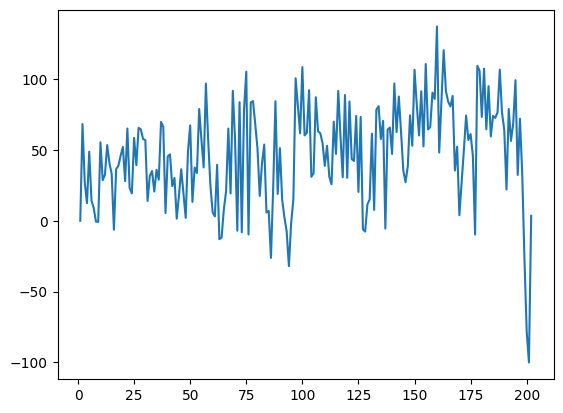

In [106]:
plt.plot(pred_1)

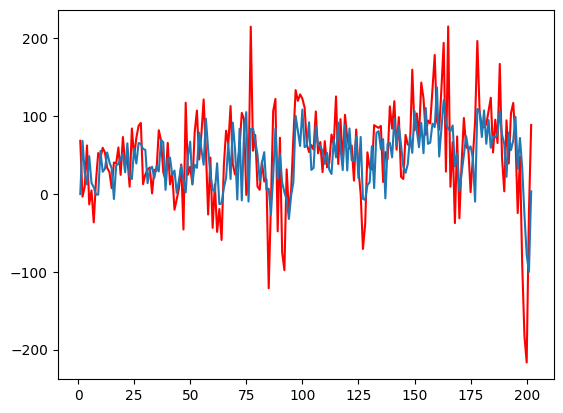

In [107]:
from matplotlib import pyplot
pyplot.plot(db["realgdp_return"].dropna(),color="red")
pyplot.plot(pred_1)

In [108]:
from statsmodels.graphics.tsaplots import plot_predict

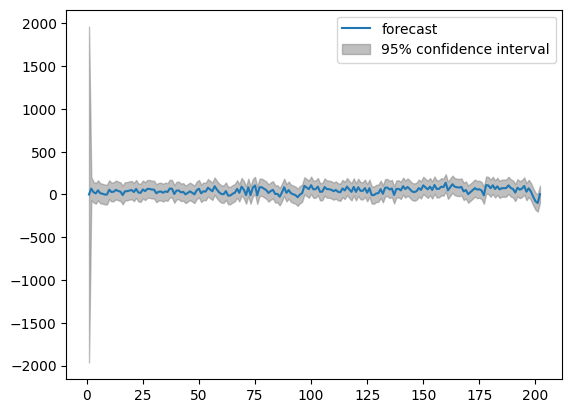

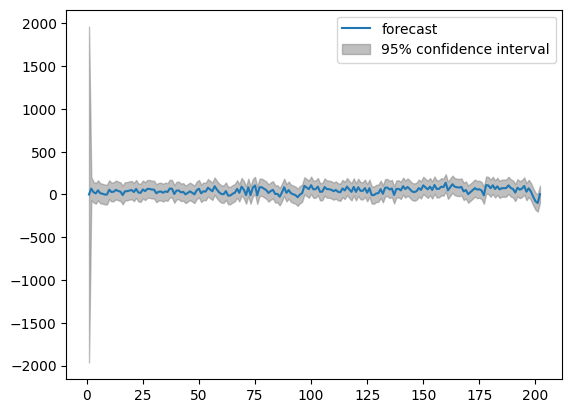

In [109]:
plot_predict(modelARIMA)

## Forecast

In [110]:
forecast = modelARIMA.forecast(steps=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [111]:
forecast

202    58.390423
203    75.275048
204    63.174376
205    45.514951
206    87.765869
Name: predicted_mean, dtype: float64

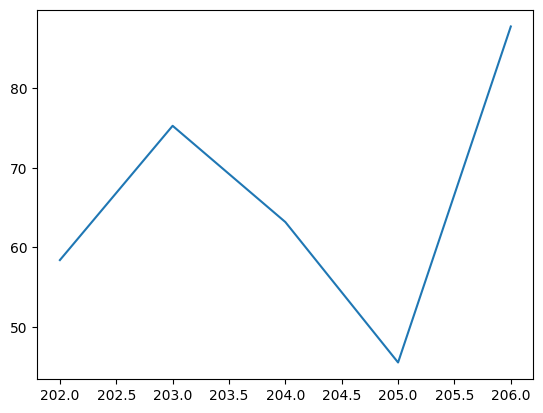

In [112]:
plt.plot(forecast)

#CPI

## 2 Database

In [113]:
db1=pd.read_csv("macrodata.csv")
db1

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

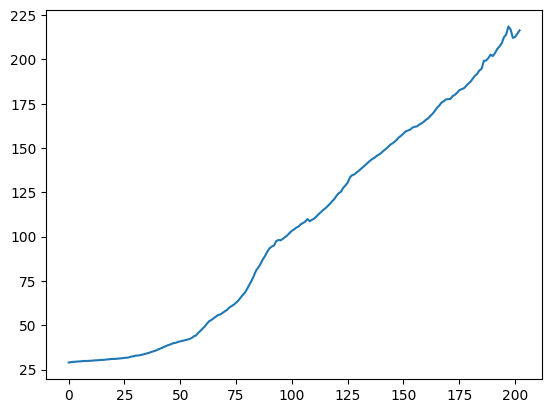

In [114]:
db1["cpi"].plot()

## 3 Stationarity

In [115]:
from statsmodels.tsa.stattools import adfuller
test_sationarity=adfuller(db1["cpi"],autolag="AIC")
print("P-Value: ", test_sationarity[1])

P-Value:  0.9904328188337422


## 3.1 First diff

In [116]:
db1["cpi_return"]=db1["cpi"]-db1["cpi"].shift(1)

In [117]:
db1

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,cpi_return
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,NaN
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,0.170
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,0.200
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,0.020
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,0.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-1.721
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-4.715
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,0.497
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,1.798


In [118]:
test_stationarity_2=adfuller(db1["cpi_return"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  0.05891880557886097


## 4 Partial Aitocorrelation

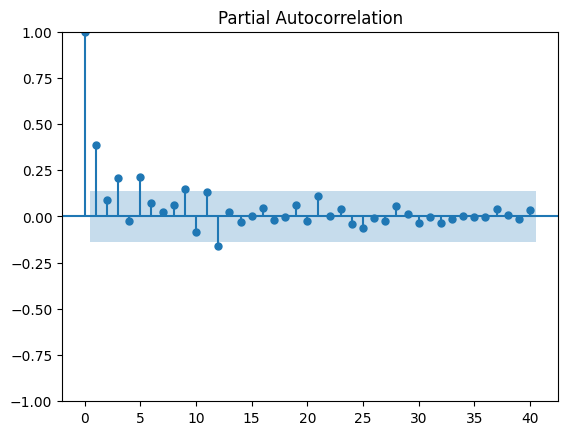

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db1["cpi_return"].dropna(),lags=40)

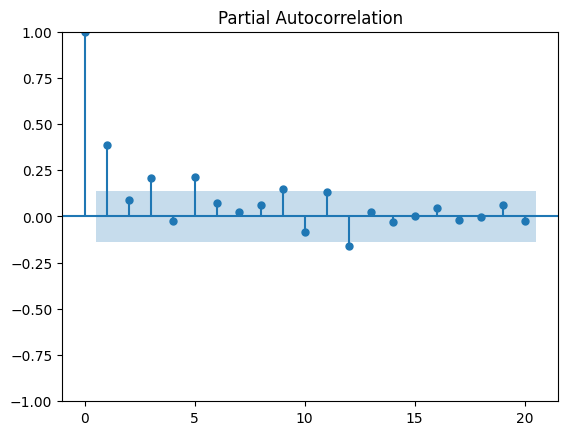

In [120]:
pacf=plot_pacf(db1["cpi_return"].dropna(),lags=20)

## 4.1 Auto acf

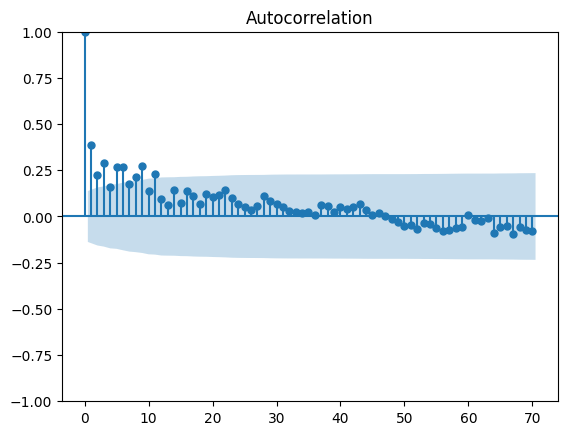

In [121]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db1["cpi_return"].dropna(), lags=70)

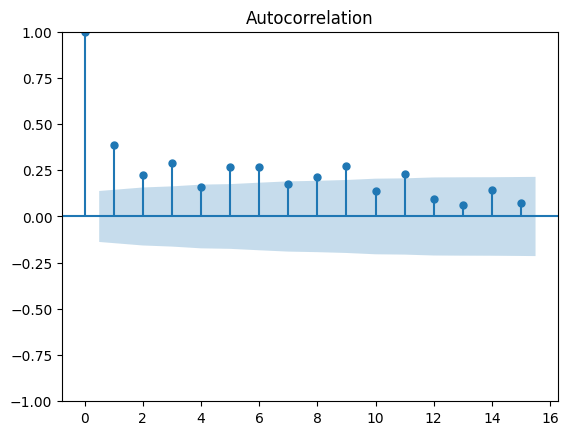

In [122]:
acf=plot_acf(db1["cpi_return"].dropna(), lags=15)

## 5 Autoregressive model

In [123]:
modelARIMA2 = ARIMA(db1["cpi_return"].dropna(), order=(13,1,12)).fit()
print(modelARIMA2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             cpi_return   No. Observations:                  202
Model:               ARIMA(13, 1, 12)   Log Likelihood                -215.478
Date:                Tue, 05 Sep 2023   AIC                            482.955
Time:                        00:47:35   BIC                            568.841
Sample:                             0   HQIC                           517.708
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2073      0.551     -0.376      0.707      -1.288       0.874
ar.L2         -0.3945      0.605     -0.652      0.514      -1.580       0.791
ar.L3         -0.4233      0.519     -0.816      0.4

## 6 Predictions

In [124]:
pred_2=modelARIMA2.predict(dynamic=False)
pred_2

1      0.000000
2      0.170000
3      0.188618
4      0.102860
5      0.159622
         ...   
198    1.865572
199   -1.218112
200    0.532537
201    0.539027
202    1.918799
Name: predicted_mean, Length: 202, dtype: float64

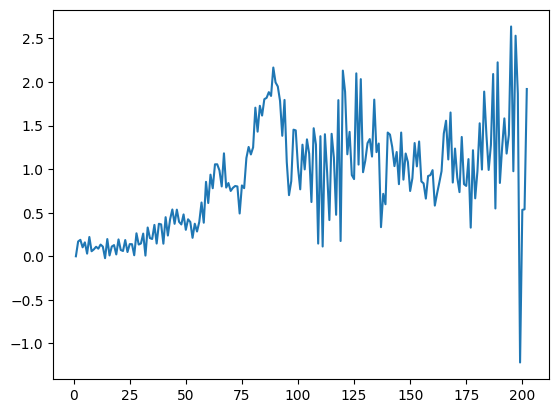

In [125]:
plt.plot(pred_2)

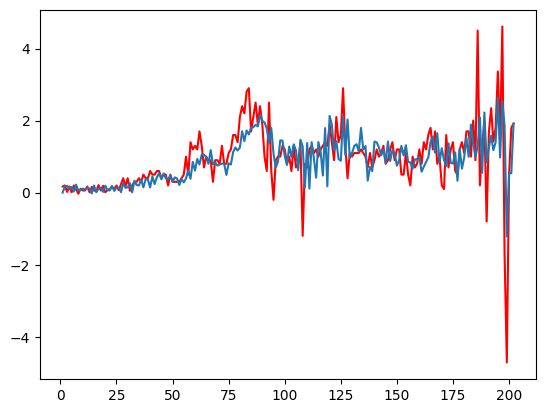

In [126]:
from matplotlib import pyplot
pyplot.plot(db1["cpi_return"].dropna(),color="red")
pyplot.plot(pred_2)

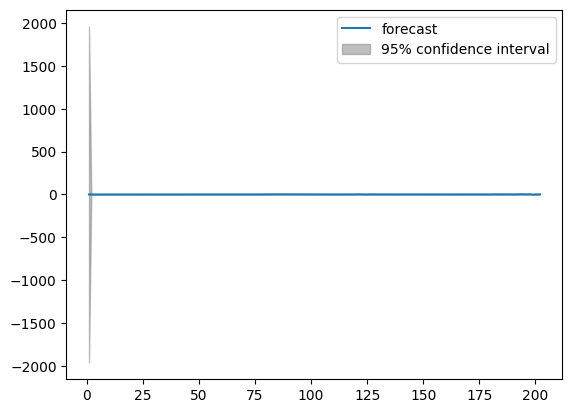

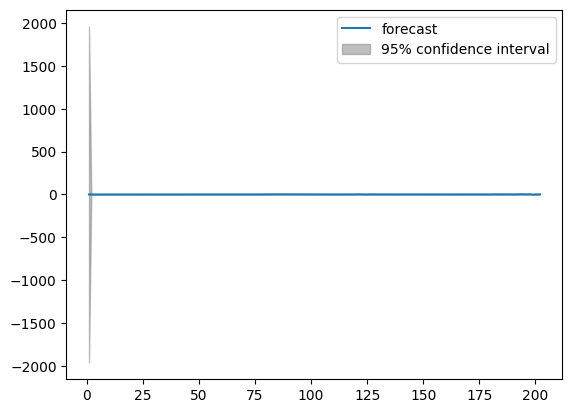

In [127]:
plot_predict(modelARIMA2)

## Forecast

In [128]:
forecast2 = modelARIMA2.forecast(steps=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [129]:
forecast2

202    3.405844
203    0.284261
204    0.507835
205    2.149725
206   -0.513929
Name: predicted_mean, dtype: float64

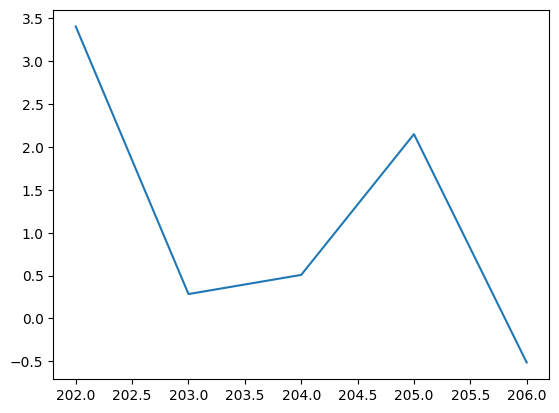

In [130]:
plt.plot(forecast2)

#Unemployment

In [131]:
db

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,realgdp_return
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,NaN
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,68.452
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,-3.313
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,9.716
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,62.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-90.666
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-182.680
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,-216.510
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,-23.906


<Axes: >

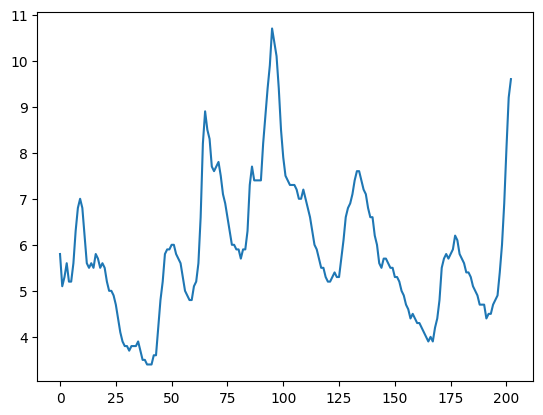

In [132]:
db["unemp"].plot()

## 3 Stationarity

In [133]:
test_sationarity=adfuller(db["unemp"],autolag="AIC")
print("P-Value: ", test_sationarity[1])

P-Value:  0.10685366457233608


## 3.1 First diff

In [134]:
db1["unemp_diff"]=db1["unemp"]-db1["unemp"].shift(1)

In [135]:
db1

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,cpi_return,unemp_diff
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,NaN,NaN
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,0.170,-0.7
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,0.200,0.2
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,0.020,0.3
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,0.170,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-1.721,0.6
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-4.715,0.9
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,0.497,1.2
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,1.798,1.1


In [136]:
test_stationarity_2=adfuller(db1["unemp_diff"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  0.0007447109360995985


## 4 Partial Aitocorrelation

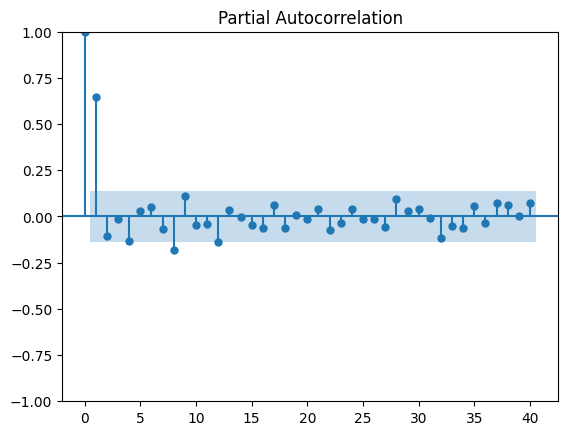

In [137]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db1["unemp_diff"].dropna(),lags=40)

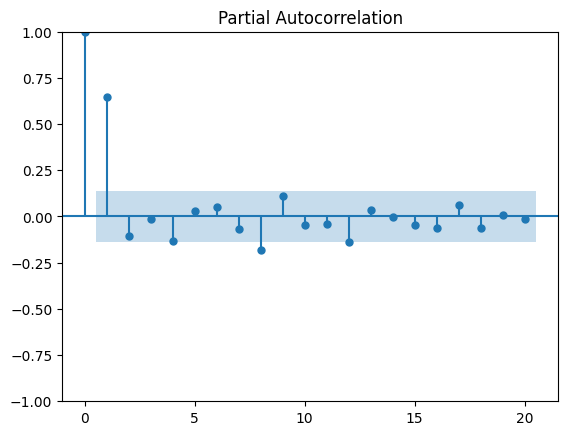

In [138]:
pacf=plot_pacf(db1["unemp_diff"].dropna(),lags=20)

## 4.1 Auto acf

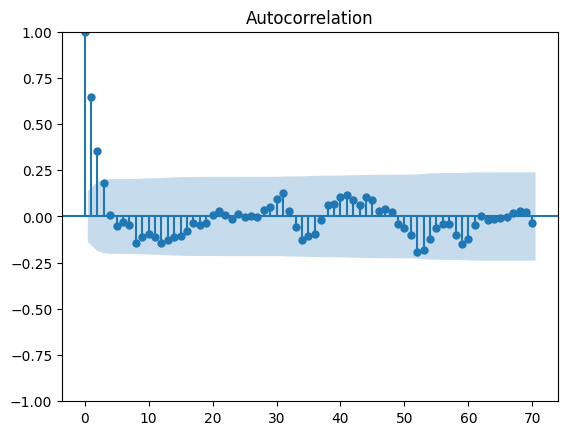

In [139]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db1["unemp_diff"].dropna(), lags=70)

## 5 Autoregressive model

In [140]:
modelARIMA3 = ARIMA(db1["unemp_diff"].dropna(), order=(14,1,4)).fit()
print(modelARIMA3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             unemp_diff   No. Observations:                  202
Model:                ARIMA(14, 1, 4)   Log Likelihood                   0.551
Date:                Tue, 05 Sep 2023   AIC                             36.897
Time:                        00:47:42   BIC                             99.660
Sample:                             0   HQIC                            62.294
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3067      0.095     -3.225      0.001      -0.493      -0.120
ar.L2         -0.2881      0.083     -3.459      0.001      -0.451      -0.125
ar.L3         -0.1684      0.105     -1.609      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 6 Predictions

In [141]:
pred_3=modelARIMA3.predict(dynamic=False)
pred_3

1      0.000000
2     -0.700000
3      0.141440
4      0.141332
5     -0.389003
         ...   
198    0.342981
199    0.506983
200    0.595749
201    0.833753
202    0.624549
Name: predicted_mean, Length: 202, dtype: float64

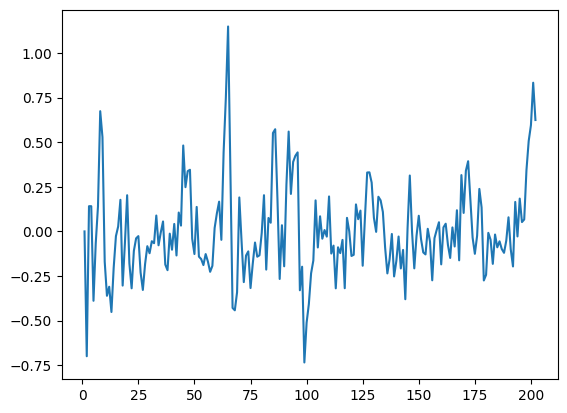

In [142]:
plt.plot(pred_3)

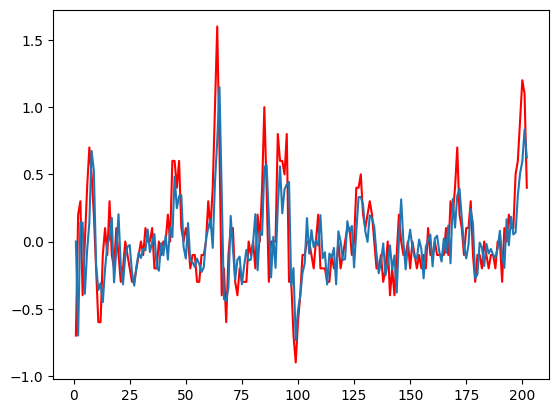

In [143]:
from matplotlib import pyplot
pyplot.plot(db1["unemp_diff"].dropna(),color="red")
pyplot.plot(pred_3)

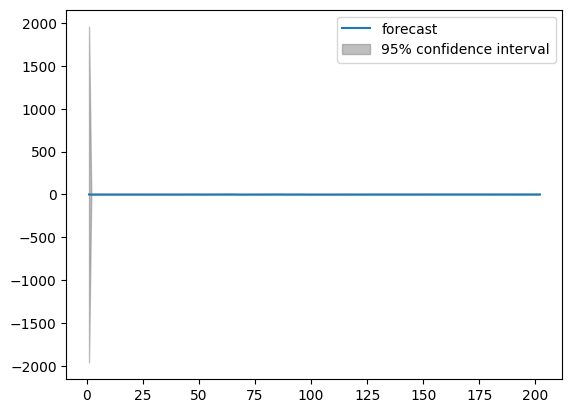

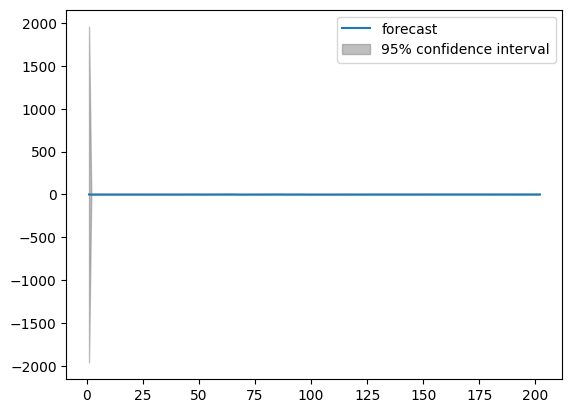

In [144]:
plot_predict(modelARIMA3)

## Forecast

In [145]:
forecast3 = modelARIMA3.forecast(steps=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [146]:
forecast3

202    0.214754
203   -0.015222
204   -0.196315
205   -0.105206
206   -0.076496
Name: predicted_mean, dtype: float64

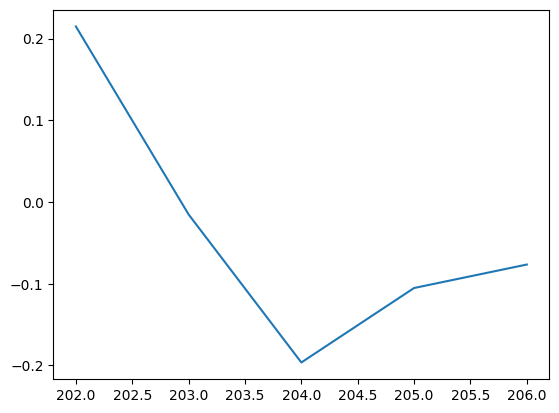

In [147]:
plt.plot(forecast3)